In [1]:
# pip install watermark

In [2]:
%load_ext watermark

In [3]:
%watermark -a "TsaiTsai" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn

TsaiTsai 2020-09-20 

CPython 3.8.5
IPython 7.16.1

numpy 1.19.1
pandas 1.0.5
matplotlib 3.3.0
scipy 1.5.2
sklearn 0.23.1

compiler   : Clang 11.0.3 (clang-1103.0.32.29)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 6
interpreter: 64bit


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [5]:
digits = load_digits()  # 手写数据集
X, y = digits.data, digits.target
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

In [6]:
Xtrain.shape

(1257, 64)

In [7]:
Xtest.shape

(540, 64)

In [8]:
np.unique(Ytrain)  # 多分类问题，类别是10个

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
gnb = GaussianNB().fit(Xtrain, Ytrain)
# 查看分数
acc_score = gnb.score(Xtest, Ytest)  # 返回预测的精确性 accuracy
acc_score

0.8592592592592593

In [10]:
# 查看预测结果
Y_pred = gnb.predict(Xtest)
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [11]:
# 查看预测的概率结果
prob = gnb.predict_proba(Xtest)
prob

array([[0.00000000e+000, 4.69391744e-052, 1.74871280e-098, ...,
        0.00000000e+000, 4.19588993e-033, 1.51751459e-119],
       [0.00000000e+000, 1.00000000e+000, 9.26742456e-013, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.73608152e-026, ...,
        0.00000000e+000, 1.29541754e-039, 5.54684869e-077],
       ...,
       [0.00000000e+000, 2.43314963e-047, 4.82483668e-305, ...,
        2.31612692e-008, 1.23891596e-126, 2.87896140e-257],
       [0.00000000e+000, 8.26462929e-129, 4.99150558e-012, ...,
        0.00000000e+000, 4.01802372e-003, 6.19000712e-013],
       [0.00000000e+000, 9.99929965e-001, 1.45462767e-013, ...,
        5.05856094e-005, 1.94498169e-005, 3.42317317e-042]])

In [12]:
prob.shape  # 每一列对应一个标签类别下的概率

(540, 10)

In [13]:
prob[1, :].sum()  # 每一行的和都是一

1.000000000000003

In [14]:
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [15]:
# 使用混淆矩阵来查看贝叶斯的分类结果
from sklearn.metrics import confusion_matrix as CM

In [16]:
CM(Ytest, Y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]])

## [探索贝叶斯：高斯朴素贝叶斯擅长的数据集](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

Automatically created module for IPython interactive environment


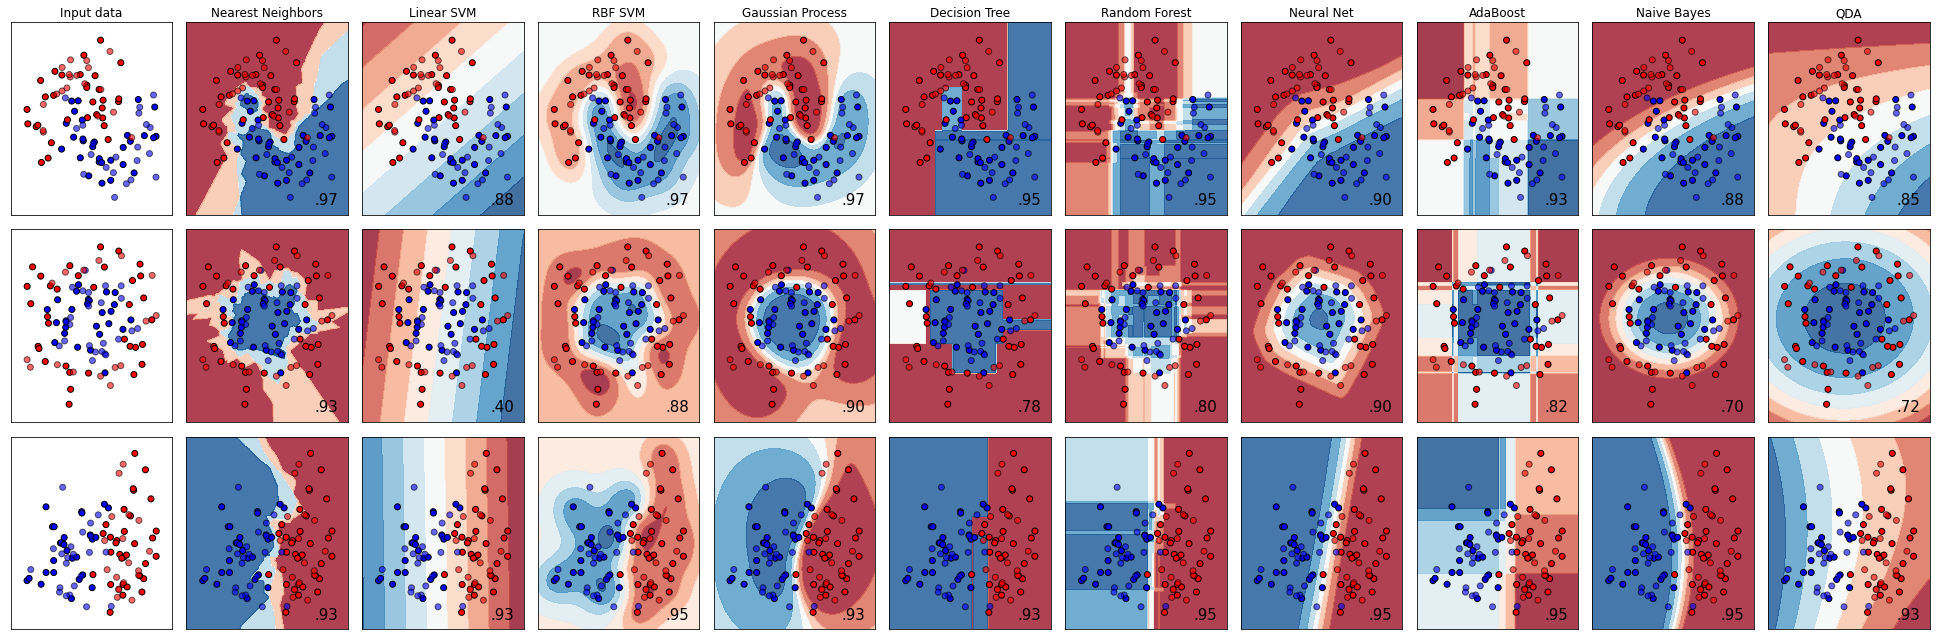

In [17]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

## [探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

### 首先导入需要的模块和库

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve  # 画学习曲线的类
from sklearn.model_selection import ShuffleSplit  # 设定交叉验证模式的类
from time import time
import datetime

### 定义绘制学习曲线的函数

In [19]:
def plot_learning_curve(estimator, title, X, y,
                        ax,  # 选择子图
                        ylim=None,  # 设置纵坐标的取值范围
                        cv=None,  # 交叉验证
                        n_jobs=None  # 设定索要使用的线程
                        ):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()  # 显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1),
            'o-', color="r", label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1),
            'o-', color="g", label="Test score")
    ax.legend(loc="best")
    return ax

### 导入数据，定义循环

In [20]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape

(1797, 64)

In [21]:
X  # 是一个稀疏矩阵

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
title = ["Naive Bayes", "DecisionTree",
         "SVM, RBF kernel", "RandomForest", "Logistic"]
model = [GaussianNB(), DTC(), SVC(gamma=0.001), RFC(
    n_estimators=50), LR(C=.1, solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

### 进入循环，绘制学习曲线

Naive Bayes:00:01:111096
DecisionTree:00:00:751567
SVM, RBF kernel:00:05:561876
RandomForest:00:06:848944
Logistic:00:04:631027


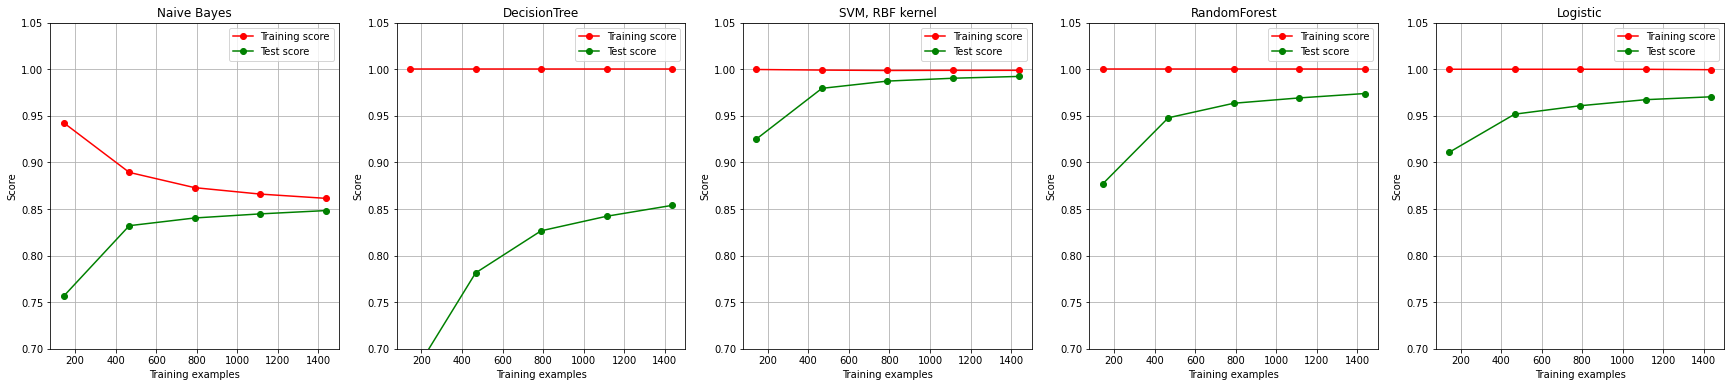

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(30, 6))
for ind, title_, estimator in zip(range(len(title)), title, model):
    times = time()
    plot_learning_curve(estimator, title_, X, y, ax=axes[ind], ylim=[
                        0.7, 1.05], n_jobs=4, cv=cv)
    print("{}:{}".format(title_, datetime.datetime.fromtimestamp(
        time()-times).strftime("%M:%S:%f")))
plt.show()

In [24]:
[*zip(range(len(title)),title,model)]

[(0, 'Naive Bayes', GaussianNB()),
 (1, 'DecisionTree', DecisionTreeClassifier()),
 (2, 'SVM, RBF kernel', SVC(gamma=0.001)),
 (3, 'RandomForest', RandomForestClassifier(n_estimators=50)),
 (4, 'Logistic', LogisticRegression(C=0.1))]

In [25]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=50  # 把数据分为多少份
                  , test_size=0.2  # 20% * 50 份的数据会被作为测试集
                  , random_state=0  # 分交叉验证的份数的时候进行的随机抽样的模式
                  )

In [26]:
train_sizes, train_scores, test_scores = learning_curve(clf  # 分类器，clf
                                                        , X, y  # 特征矩阵和标签
                                                        , cv=cv  # 表示交叉验证模式
                                                        , n_jobs=4
                                                        # 每次运行的时候可以允许算法使用多少运算资源
                                                        )

In [27]:
train_sizes #每次分训练集和测试集建模之后，训练集上的样本数量

array([ 143,  467,  790, 1113, 1437])

In [28]:
train_scores  # 训练集上的分数

array([[0.93006993, 0.94405594, 0.95104895, 0.87412587, 0.95804196,
        0.99300699, 0.95804196, 0.96503497, 0.95804196, 0.91608392,
        0.93006993, 0.97902098, 0.93706294, 0.90909091, 0.93006993,
        0.94405594, 0.97902098, 0.95804196, 0.96503497, 0.94405594,
        0.95104895, 0.95804196, 0.97202797, 0.9020979 , 0.96503497,
        0.9020979 , 0.83216783, 0.96503497, 0.93006993, 0.95804196,
        0.86013986, 0.94405594, 1.        , 0.93006993, 0.97202797,
        0.94405594, 0.98601399, 0.95804196, 0.97202797, 0.95804196,
        0.97902098, 0.97202797, 0.95804196, 0.95804196, 0.8951049 ,
        0.83216783, 0.93006993, 0.90909091, 0.95804196, 0.95804196],
       [0.90149893, 0.91006424, 0.90578158, 0.86509636, 0.8993576 ,
        0.91862955, 0.89721627, 0.90364026, 0.91220557, 0.86937901,
        0.82441113, 0.91220557, 0.90792291, 0.88008565, 0.88650964,
        0.90792291, 0.8608137 , 0.90364026, 0.88008565, 0.92077088,
        0.90149893, 0.87366167, 0.86295503, 0.8

In [29]:
train_scores.shape

(5, 50)

In [30]:
np.mean(train_scores, axis=1)

array([0.94265734, 0.88929336, 0.87291139, 0.86601977, 0.86144746])

In [31]:
test_scores.shape

(5, 50)

## 多项式朴素贝叶斯MultinomialNB

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [37]:
class_1 = 500
class_2 = 500  # 两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]]  # 设定两个类别的中心
clusters_std = [0.5, 0.5]  # 设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [38]:
X.shape

(1000, 2)

In [39]:
np.unique(y)

array([0, 1])

In [40]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, y, test_size=0.3, random_state=420)

### 归一化，确保输入的矩阵不带有负数

In [41]:
mms = MinMaxScaler().fit(Xtrain)  # 训练集上来实例化和训练我们的模型
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

### 建立一个多项式朴素贝叶斯分类器

In [42]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [43]:
# 重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
# 由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [44]:
Ytrain == 1  # 计数：所有标签类别=1的样本量

array([ True, False, False, False,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True,

In [45]:
(Ytrain == 0).sum()/Ytrain.shape[0]

0.5014285714285714

In [46]:
mnb.class_log_prior_.shape  # 永远等于标签中所带的类别数量

(2,)

In [47]:
# 可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [48]:
# 重要属性：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [49]:
mnb.feature_log_prob_.shape  # 2个特征，2个标签

(2, 2)

In [50]:
# 重要属性：在fit时每个标签类别下包含的样本数
# 当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
mnb.class_count_

array([351., 349.])

In [51]:
mnb.class_count_.shape  # 返回和我们的标签类别一样的结构

(2,)

In [52]:
# 一些传统的接口
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
mnb.predict_proba(Xtest_)  # 每个样本在每个标签取值下的概率

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [54]:
mnb.score(Xtest_, Ytest)

0.5433333333333333

In [55]:
brier_score_loss(Ytest, mnb.predict_proba(Xtest_)[:, 1], pos_label=1)

0.24977828412546027

In [56]:
# 来试试看把Xtiain转换成分类型数据吧
# 注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会有负数了
from sklearn.preprocessing import KBinsDiscretizer  # 对连续性变量进行分箱
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)

In [57]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [58]:
Xtrain_.shape  # 2个特征中，每个特征分了10个箱所分出来的哑变量

(700, 20)

In [59]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [60]:
mnb.score(Xtest_, Ytest)

0.9966666666666667

In [61]:
brier_score_loss(Ytest, mnb.predict_proba(Xtest_)[:, 1], pos_label=1)

0.0014593932778211862

## 伯努利朴素贝叶斯BernoulliNB

In [62]:
from sklearn.naive_bayes import BernoulliNB

In [63]:
# 普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
# 然而这样效率过低，因此我们选择归一化之后直接设置一个阈值

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [64]:
# 不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
bnl_.score(Xtest_, Ytest)

0.49666666666666665

In [65]:
brier_score_loss(Ytest, bnl_.predict_proba(Xtest_)[:, 1], pos_label=1)

0.25000009482193225

In [66]:
# 设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_, Ytest)

0.9833333333333333

In [67]:
brier_score_loss(Ytest, bnl.predict_proba(Xtest_)[:, 1], pos_label=1)

0.010405875827339534